In [62]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from insightface.utils import face_align
from matplotlib import pyplot as plt

app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/hp/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/hp/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/hp/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/hp/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/hp/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 64

In [63]:
img = cv2.imread('FFHQ/00003.png')
face_info = app.get(img)
print(face_info[0].keys())

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])


In [64]:
img_emb_results = app.get(np.asarray(img))
img_emb = img_emb_results[0].embedding
img_emb.shape

(512,)

In [65]:
print(face_info[0].kps)

[[47.662712 59.955585]
 [80.34861  60.141724]
 [64.063095 77.262215]
 [51.954384 92.75363 ]
 [75.323975 92.80284 ]]


(128, 128, 3)


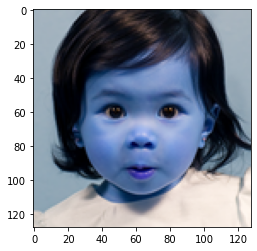

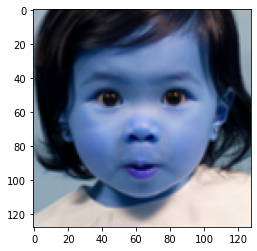

In [66]:
face = face_info[0].keys()
#crop the face and align it
print(img.shape)
cropped = face_align.norm_crop(img, face_info[0].kps, image_size=128)
plt.imshow(img)
plt.show()
plt.imshow(cropped)
plt.show()

In [67]:
crop_emb_results = app.get(np.asarray(cropped))
print(crop_emb_results)

[]


In [68]:
img_embedding = img_emb
crop_embedding = app.get(cropped)[0].embedding

print(np.linalg.norm(img_embedding - crop_embedding))

IndexError: list index out of range